# Appendix

## Imports

In [22]:
%load_ext autoreload
%autoreload 2

import dolfin
import numpy
import sympy
from numpy import linspace
from sympy import lambdify
import scipy.optimize
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

import dolfin_mech     as dmech
import matplotlib.pyplot as plt
import micro_poro_structure_generator as gen
from shapely.geometry import LineString

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Experimental data

In [23]:
smith_gamma_0_inf = numpy.array([
[0.10261460510291531, 10.12867762052346],
[1.0670404781958325, 14.37579169470247],
[1.8163827631860017, 17.871672403295065],
[1.9748719391855454, 19.573866563700566],
[2.1594615644511066, 22.10912106780112],
[2.5164854274353257, 27.42241317661467],
[2.9066567368768337, 34.04958685994136],
[3.3937484592561367, 43.15381056445911],
[3.9145957698017324, 52.5539186331707],
[4.541473207864893, 60.481952639401214],
[5.217917918528443, 68.62351762513866],
[6.241172193676007, 77.1946779015478],
[7.261758091937126, 83.31499516204023],
[8.569970196446437, 88.40221757910093],
[9.93786458361406, 92.1302691779124],
[11.647661204005693, 95.2594309371248],
[13.021679205851322, 96.96864019630578],
[14.650664963066118, 98.82977258733175],
[16.227410106371963, 100.22737839699602]])

p_smith_gamma_0_inf = smith_gamma_0_inf[:, 0]
v_smith_gamma_0_inf = smith_gamma_0_inf[:, 1]


smith_gamma_0_inf_reduced = numpy.array([
[0.10261460510291531, 10.12867762052346],
[1.8163827631860017, 17.871672403295065],
[3.3937484592561367, 43.15381056445911],
[5.217917918528443, 68.62351762513866],
[7.261758091937126, 83.31499516204023],
[8.569970196446437, 88.40221757910093],
[9.93786458361406, 92.1302691779124],
[11.647661204005693, 95.2594309371248],
[13.021679205851322, 96.96864019630578],
[14.650664963066118, 98.82977258733175],
[16.227410106371963, 100.22737839699602]])




smith_gamma_0_def = numpy.array([
[0.005402644675070236, 9.624888713050963],
[0.1668047591213219, 13.336914018852813],
[0.4784246543693627, 17.576913749523595],
[0.7895795886163685, 22.629626469396946],
[1.049528165662428, 26.98978789511438],
[1.4526998927990538, 32.2156737299415],
[1.807379219882079, 37.46576576043189],
[2.0644723299109122, 42.66182849231477],
[2.3007533812195033, 46.81773063897312],
[2.509263120564099, 50.627115670978604],
[2.7535495873687714, 53.840855918968124],
[3.033910963145054, 58.58295961002058],
[3.3518634250702353, 62.883333664190346],
[3.6492919019388586, 66.62339892776788],
[3.9266765165237323, 69.96982003584168],
[4.321256572989058, 74.121866131073],
[4.807696750702351, 77.78184588726738],
[5.332289000120139, 81.33215478582349],
[6.19081927283565, 85.6636911592568],
[7.169511640775174, 89.30143732413063],
[8.129095122356942, 92.16244173869191],
[9.204640888381636, 94.35632139473529],
[10.399191401051679, 96.39406440195621],
[11.51269213574782, 97.66598370813628],
[12.540963497384666, 98.63105344989252],
[13.656157296595447, 99.30917055539747],
[14.80094434734493, 99.84170685998932],
[16.163451913791032, 100.36715330509323]])

p_smith_gamma_0_def = smith_gamma_0_def[:, 0]
v_smith_gamma_0_def = smith_gamma_0_def[:, 1]



exp_gamma_inflation = numpy.array([
[0.06730815882374686, 9.704082647849843],
[1.9322465182796098, 18.75700665185124],
[3.4904268573026025, 25.24833117463643],
[5.0286694664442555, 31.078643783434696],
[6.485063777631968, 36.02635154219419],
[8.137474528223422, 40.85147550038641],
[9.557268322351398, 44.93923178251944],
[10.429459351434275, 48.12334953139618],
[11.13903532432907, 50.721496058796426],
[11.582845653740943, 53.03754902052973],
[12.014764100158954, 56.587605306853625],
[12.381906403639288, 59.541154955663416],
[12.738693216998744, 63.12519130210577],
[13.224845321048353, 67.58970758392769],
[13.71729461430763, 72.15341503063678],
[14.467392949227415, 77.39116992549216],
[15.062808361558297, 80.80264982801819],
[15.7830582217812, 83.76429049803036],
[16.604808563137663, 86.56123913729672],
[17.30965659020128, 88.45492630421222],
[18.262457705876646, 90.70552669360191],
[19.188369419312806, 92.41092859026006],
[20.0090963410746, 93.80091253847083],
[21.134686061797648, 95.50390718915142],
[22.37148737847479, 97.0422116665291],
[23.392364849410395, 98.10527452251237],
[24.66582227631044, 99.1742013256802],
[25.503449519675073, 99.89714224285996],
[26.342977038435237, 100.47381510525955]])

p_exp_gamma_inflation = exp_gamma_inflation[:, 0]
v_exp_gamma_inflation = exp_gamma_inflation[:, 1]

exp_gamma_deflation = numpy.array([
[0.033315466508945735, 10.125150090091784],
[0.3325077628271477, 15.469867690860674],
[0.6191410581934792, 20.2188364908121],
[0.9880522350473163, 25.69086322684497],
[1.41976347058443, 30.849494769731063],
[1.903019676225418, 36.29383074725043],
[2.387852706130785, 40.9955684895495],
[2.8946399815632855, 45.92731709905034],
[3.389100736544433, 50.388452834823525],
[3.8509485204421114, 54.5232692898636],
[4.435283204568979, 58.93423177845629],
[4.978297006690818, 63.01316892177646],
[5.6483816180411806, 66.71826968050705],
[6.308889043555006, 70.19024649776242],
[7.141245044266598, 73.81700403053497],
[8.12620933179617, 77.12116088322801],
[9.284250298037113, 79.99941722729517],
[10.286397926909286, 81.87430521478251],
[11.52414432736027, 83.52747024521612],
[12.420447627485954, 84.82535660291342],
[13.238940714873207, 86.536784044287],
[14.338735207886664, 88.75594535542344],
[15.472133241072749, 90.83806081569836],
[16.52893905718616, 92.9106327344357],
[17.75050784715548, 94.83745482495748],
[18.961812117634558, 96.40332561217544],
[20.212168058276653, 97.9201803391296],
[21.564067438405665, 98.71853529483946],
[23.081649606544804, 99.45258743535082],
[24.763893670061364, 100.17813063001095],
[26.29242769134445, 100.41890352128218]])

p_exp_gamma_deflation = exp_gamma_deflation[:, 0]
v_exp_gamma_deflation = exp_gamma_deflation[:, 1]

exp_gamma_7 = numpy.array([
[4.083121222333912, 19.78683326799569],
[4.309585014327967, 24.99467644316821],
[4.734796967945416, 31.748170078597674],
[5.112267654333861, 38.132349674590955],
[5.484985626814271, 44.490498963993446],
[6.041425550834688, 51.64540078444874],
[6.4731404832273824, 58.37967384592169],
[6.909151943472297, 64.80683901586588],
[7.587607672544064, 72.63254093933045],
[8.432063921375336, 79.43065697085517],
[9.450573770339183, 85.19520614851174],
[11.256134904457618, 91.2667665277814],
[12.877927537438513, 94.14261469042695],
[14.624673255075038, 96.42325009166119],
[16.28122447253321, 98.30618950999019],
[18.045314570210227, 99.97564450087759]])

p_exp_gamma_7 = exp_gamma_7[:, 0]
v_exp_gamma_7 = exp_gamma_7[:, 1]

## Defining geometry

In [24]:
seeds_filename = "ch4.dat"
mesh_filebasename = "ch4-mesh"

domain_y = 0.1 * 0.8
domain_x = domain_y * numpy.sqrt(3)/1.5/2
thickness = 0.012 * 0.8

gen.generate_seeds_semi_regular(
    DoI = 0.,
    row = 1,
    domain_y = domain_y,
    seeds_filename = seeds_filename)
gen.generate_mesh_2D_rectangle_w_voronoi_inclusions(
    mesh_filename = mesh_filebasename,
    seeds_filename = seeds_filename,
    h = thickness,
    lcar = thickness/5,
    domain_x = domain_x,
    domain_y = domain_y,
    shift_y = 0.,
    remove_seeds = True)

mesh = dolfin.Mesh()
dolfin.XDMFFile(mesh_filebasename+".xdmf").read(mesh)
dV = dolfin.Measure("dx",domain=mesh)

coord = mesh.coordinates()
xmax = max(coord[:,0]); xmin = min(coord[:,0])
ymax = max(coord[:,1]); ymin = min(coord[:,1])

V = (xmax - xmin)*(ymax - ymin)
VS0 = dolfin.assemble(dolfin.Constant(1) * dV)
Vf0 = V - VS0

[[0.02309401 0.02      ]
 [0.         0.06      ]
 [0.06928203 0.02      ]
 [0.04618802 0.06      ]]
Info    : Clearing all models and views...
Info    : Done clearing all models and views


/Users/tayebi/miniconda3/envs/all/lib/python3.8/site-packages/micro_poro_structure_generator/generate_mesh_2D_rectangle_w_voronoi_inclusions.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  m = (Q[1] - P[1])/(Q[0] - P[0])
/Users/tayebi/miniconda3/envs/all/lib/python3.8/site-packages/micro_poro_structure_generator/generate_mesh_2D_rectangle_w_voronoi_inclusions.py:61: RuntimeWarning: invalid value encountered in double_scalars
  x = (c2 - c1)/(m1 - m2)
/Users/tayebi/miniconda3/envs/all/lib/python3.8/site-packages/micro_poro_structure_generator/generate_mesh_2D_rectangle_w_voronoi_inclusions.py:62: RuntimeWarning: invalid value encountered in double_scalars
  y = (m2*c1 - m1*c2)/(m2 - m1)
/Users/tayebi/miniconda3/envs/all/lib/python3.8/site-packages/micro_poro_structure_generator/generate_mesh_2D_rectangle_w_voronoi_inclusions.py:45: RuntimeWarning: invalid value encountered in double_scalars
  c = P[1] - m * P[0]


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 122 (Line)
Info    : [ 10%] Meshing curve 123 (Line)
Info    : [ 10%] Meshing curve 124 (Line)
Info    : [ 20%] Meshing curve 152 (Line)
Info    : [ 20%] Meshing curve 153 (Line)
Info    : [ 20%] Meshing curve 154 (Line)
Info    : [ 30%] Meshing curve 155 (Line)
Info    : [ 30%] Meshing curve 156 (Line)
Info    : [ 30%] Meshing curve 157 (Line)
Info    : [ 40%] Meshing curve 158 (Line)
Info    : [ 40%] Meshing curve 159 (Line)
Info    : [ 40%] Meshing curve 160 (Line)
Info    : [ 50%] Meshing curve 161 (Line)
Info    : [ 50%] Meshing curve 162 (Line)
Info    : [ 50%] Meshing curve 163 (Line)
Info    : [ 60%] Meshing curve 164 (Line)
Info    : [ 60%] Meshing curve 165 (Line)
Info    : [ 70%] Meshing curve 166 (Line)
Info    : [ 70%] Meshing curve 167 (Line)
Info    : [ 70%] Meshing curve 168 (Line)
Info    : [ 80%] Meshing curve 169 (Line)
Info    : [ 80%] Meshing curve 170 (Line)
Info    : [ 80%] Meshing curve 171 (Line)
Info    : 

In [25]:
mesh = dolfin.Mesh()
dolfin.XDMFFile(mesh_filebasename+".xdmf").read(mesh)
dV = dolfin.Measure("dx",domain=mesh)

coord = mesh.coordinates()
xmax = max(coord[:,0]); xmin = min(coord[:,0])
ymax = max(coord[:,1]); ymin = min(coord[:,1])

V = (xmax - xmin)*(ymax - ymin)
VS0 = dolfin.assemble(dolfin.Constant(1) * dV)
Vf0 = V - VS0

## Loading 

In [26]:
qois_filename = "Fig5-qois.dat"
res_basename = "Fig5"

load_params = {}
load_params["pf"] = 4
load_params["sigma_bar_00"] = 0.0
load_params["sigma_bar_11"] = 0.0
load_params["sigma_bar_01"] = 0.0
load_params["sigma_bar_10"] = 0.0

## Identifier function

In [27]:
params_dimless = [0, 0,  0, 0]
params_initial = [0.08855929243285596, 0.011039510924095856, 0.6281487879627474, 3.409513378002055]
exp_data = numpy.vstack((smith_gamma_0_def, smith_gamma_0_inf))
p_exp = exp_data[:, 0]
v_exp = exp_data[:, 1]

bnds = [(-0.9, 10), (-0.8, 10), (-0.2, 0.2), (-0.3, 4)]
asym_slope = 0.1 * Vf0

def J_cost(params_dimless):
    par = [params_initial[0]*(1 + params_dimless[0]), params_initial[1]*(1 + params_dimless[1]), params_initial[2]*(1 + params_dimless[2]), params_initial[3]*(1 + params_dimless[3])]
    print(par)
    # graph_printer(smith_gamma_0_inf, par)

    mat_params = {"model":"exponential", "parameters":{"beta1":par[0], "beta2":par[1], "beta3":par[2], "alpha":par[3]}} 


    dmech.run_HollowBox_MicroPoroHyperelasticity(
        dim=2,
        mesh=mesh,
        mat_params=mat_params,
        load_params=load_params,
        step_params={"Deltat":1., "dt_ini":0.1, "dt_min":0.005, "dt_max":0.1},
        res_basename=res_basename,
        write_qois_limited_precision=False,
        verbose=1
    )

    qois_vals = numpy.loadtxt(qois_filename)
    qois_name_list = open(qois_filename).readline().split()
    pf_lst = qois_vals[:, qois_name_list.index("p_f") - 1]*10.20
    vf_lst = qois_vals[:, qois_name_list.index("vf") - 1]

    for i in range(1, len(vf_lst)):
        slope = (vf_lst[i] - vf_lst[i - 1])/(pf_lst[i] - pf_lst[i - 1])
        if slope < asym_slope:
            break

    vf_asym = vf_lst[i]
    vf_lst = [vf_/vf_asym *100 for vf_ in vf_lst]

    model_interpolator = interp1d(pf_lst, vf_lst, kind='cubic')  # 'cubic' for cubic spline

    JC = 0
    for i in range(len(exp_data)):
        JC += (v_exp[i] - model_interpolator(p_exp[i]))**2

    print("JC: " +str(JC))
    return JC

## Eigenvalues and Eigenvectors 

In [35]:
params_dimless = [0, 0, 0, 0]
h = 1e-2
cost_0 =  J_cost([params_dimless[0], params_dimless[1], params_dimless[2], params_dimless[3]])
H_11 = (J_cost([params_dimless[0]+h, params_dimless[1], params_dimless[2], params_dimless[3]]) - 2 * cost_0 + J_cost([params_dimless[0]-h, params_dimless[1], params_dimless[2], params_dimless[3]]))/h**2
H_22 = (J_cost([params_dimless[0], params_dimless[1]+h, params_dimless[2], params_dimless[3]]) - 2 * cost_0 + J_cost([params_dimless[0], params_dimless[1]-h, params_dimless[2], params_dimless[3]]))/h**2
H_33 = (J_cost([params_dimless[0], params_dimless[1], params_dimless[2]+h, params_dimless[3]]) - 2 * cost_0 + J_cost([params_dimless[0], params_dimless[1], params_dimless[2]-h, params_dimless[3]]))/h**2
H_44 = (J_cost([params_dimless[0], params_dimless[1], params_dimless[2], params_dimless[3]+h]) - 2 * cost_0 + J_cost([params_dimless[0], params_dimless[1], params_dimless[2], params_dimless[3]-h]))/h**2
H_12 = (J_cost([params_dimless[0]+h/2, params_dimless[1]+h/2, params_dimless[2], params_dimless[3]]) - J_cost([params_dimless[0]-h/2, params_dimless[1]+h/2, params_dimless[2], params_dimless[3]]) - J_cost([params_dimless[0]+h/2, params_dimless[1]-h/2, params_dimless[2], params_dimless[3]]) + J_cost([params_dimless[0]-h/2, params_dimless[1]-h/2, params_dimless[2], params_dimless[3]]))/h**2
H_13 = (J_cost([params_dimless[0]+h/2, params_dimless[1], params_dimless[2]+h/2, params_dimless[3]]) - J_cost([params_dimless[0]-h/2, params_dimless[1], params_dimless[2]+h/2, params_dimless[3]]) - J_cost([params_dimless[0]+h/2, params_dimless[1], params_dimless[2]-h/2, params_dimless[3]]) + J_cost([params_dimless[0]-h/2, params_dimless[1], params_dimless[2]-h/2, params_dimless[3]]))/h**2
H_14 = (J_cost([params_dimless[0]+h/2, params_dimless[1], params_dimless[2], params_dimless[3]+h/2]) - J_cost([params_dimless[0]-h/2, params_dimless[1], params_dimless[2], params_dimless[3]+h/2]) - J_cost([params_dimless[0]+h/2, params_dimless[1], params_dimless[2], params_dimless[3]-h/2]) + J_cost([params_dimless[0]-h/2, params_dimless[1], params_dimless[2], params_dimless[3]-h/2]))/h**2
H_23 = (J_cost([params_dimless[0], params_dimless[1]+h/2, params_dimless[2]+h/2, params_dimless[3]]) - J_cost([params_dimless[0], params_dimless[1]-h/2, params_dimless[2]+h/2, params_dimless[3]]) - J_cost([params_dimless[0], params_dimless[1]+h/2, params_dimless[2]-h/2, params_dimless[3]]) + J_cost([params_dimless[0], params_dimless[1]-h/2, params_dimless[2]-h/2, params_dimless[3]]))/h**2
H_24 = (J_cost([params_dimless[0], params_dimless[1]+h/2, params_dimless[2], params_dimless[3]+h/2]) - J_cost([params_dimless[0], params_dimless[1]-h/2, params_dimless[2], params_dimless[3]+h/2]) - J_cost([params_dimless[0], params_dimless[1]+h/2, params_dimless[2], params_dimless[3]-h/2]) + J_cost([params_dimless[0], params_dimless[1]-h/2, params_dimless[2], params_dimless[3]-h/2]))/h**2
H_34 = (J_cost([params_dimless[0], params_dimless[1], params_dimless[2]+h/2, params_dimless[3]+h/2]) - J_cost([params_dimless[0], params_dimless[1], params_dimless[2]-h/2, params_dimless[3]+h/2]) - J_cost([params_dimless[0], params_dimless[1], params_dimless[2]+h/2, params_dimless[3]-h/2]) + J_cost([params_dimless[0], params_dimless[1], params_dimless[2]-h/2, params_dimless[3]-h/2]))/h**2
H_21 = H_12
H_31 = H_13
H_32 = H_23
H_41 = H_14
H_42 = H_24
H_43 = H_34
Hess = numpy.matrix([[float(H_11), float(H_12), float(H_13), float(H_14)],
                  [float(H_21), float(H_22), float(H_23), float(H_24)],
                  [float(H_31), float(H_32), float(H_33), float(H_34)],
                  [float(H_41), float(H_42), float(H_43), float(H_44)]])
# print(Hess)
print(numpy.linalg.eig(Hess))

[0.08855929243285596, 0.011039510924095856, 0.6281487879627474, 3.409513378002055]


/Users/tayebi/miniconda3/envs/all/lib/python3.8/site-packages/ufl/exproperators.py:336: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


JC: 2409.4397232151023
[0.08944488535718452, 0.011039510924095856, 0.6281487879627474, 3.409513378002055]
JC: 2409.3959543309543
[0.0876736995085274, 0.011039510924095856, 0.6281487879627474, 3.409513378002055]
JC: 2409.5541685761364
[0.08855929243285596, 0.011149906033336815, 0.6281487879627474, 3.409513378002055]
JC: 2409.248800094905
[0.08855929243285596, 0.010929115814854897, 0.6281487879627474, 3.409513378002055]
JC: 2409.7847894444617
[0.08855929243285596, 0.011039510924095856, 0.6344302758423749, 3.409513378002055]
JC: 2411.5463346524775
[0.08855929243285596, 0.011039510924095856, 0.62186730008312, 3.409513378002055]
JC: 2412.7598338636794
[0.08855929243285596, 0.011039510924095856, 0.6281487879627474, 3.4436085117820756]
JC: 2413.4430089356892
[0.08855929243285596, 0.011039510924095856, 0.6281487879627474, 3.3754182442220344]
JC: 2412.3373364719528
[0.08900208889502023, 0.011094708478716334, 0.6281487879627474, 3.409513378002055]
JC: 2409.285549209548
[0.08811649597069168, 0.01

[0.07970336318957036, 0.00993555983168627, 0.6281487879627474, 3.409513378002055]
JC: 2421.211300038539
[0.07970336318957036, 0.010156350050168189, 0.6281487879627474, 3.409513378002055]
JC: 2418.3532450026078
[0.07970336318957036, 0.010377140268650104, 0.6281487879627474, 3.409513378002055]
JC: 2416.2575592140433
[0.07970336318957036, 0.01059793048713202, 0.6281487879627474, 3.409513378002055]
JC: 2414.880232994529
[0.07970336318957036, 0.01081872070561394, 0.6281487879627474, 3.409513378002055]
JC: 2414.1803129518544
[0.07970336318957036, 0.011039510924095856, 0.6281487879627474, 3.409513378002055]
JC: 2414.1196436068903
[0.07970336318957036, 0.011260301142577773, 0.6281487879627474, 3.409513378002055]
JC: 2414.6626349010417
[0.07970336318957036, 0.011481091361059691, 0.6281487879627474, 3.409513378002055]
JC: 2415.776052588891
[0.07970336318957036, 0.011701881579541608, 0.6281487879627474, 3.409513378002055]
JC: 2417.4288289139445
[0.07970336318957036, 0.011922671798023525, 0.628148

/var/folders/c6/mqd4t44j24zgtq0ky02bc6c80000gp/T/ipykernel_23061/953895708.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


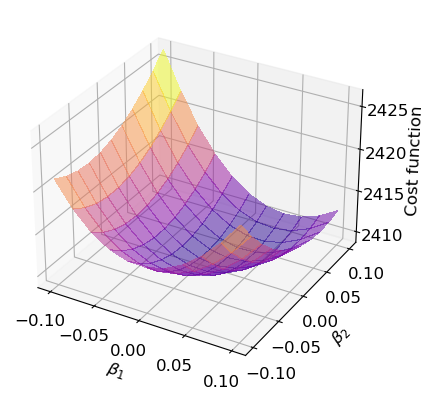

In [29]:
h2 = 0.1
C1_C2_lim=numpy.linspace(float(params_dimless[0] - h2),float(params_dimless[0] + h2),11)
C2_C1_lim=numpy.linspace(float(params_dimless[1] - h2),float(params_dimless[1] + h2),11)
 
X, Y = numpy.meshgrid(C1_C2_lim,C2_C1_lim)
Z_C1_C2= numpy.zeros((len(C1_C2_lim), len(C2_C1_lim)))
for i in range (len(C1_C2_lim)):
    for j in range (len(C2_C1_lim)):
        Z_C1_C2[i, j] = J_cost([C1_C2_lim[i], C2_C1_lim[j], params_dimless[2], params_dimless[3]])

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z_C1_C2, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

ax.set_xlabel(r'$\beta_1$', fontsize=12)
ax.set_ylabel(r'$\beta_2$', fontsize=12)
ax.set_zlabel('Cost function', fontsize=12)
plt.savefig('beta1_beta2.pdf',bbox_inches='tight')

[0.07970336318957036, 0.011039510924095856, 0.5653339091664727, 3.409513378002055]


/Users/tayebi/miniconda3/envs/all/lib/python3.8/site-packages/ufl/exproperators.py:336: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


JC: 3157.4593966869293
[0.07970336318957036, 0.011039510924095856, 0.5778968849257277, 3.409513378002055]
JC: 2980.9252365034977
[0.07970336318957036, 0.011039510924095856, 0.5904598606849826, 3.409513378002055]
JC: 2831.280956793306
[0.07970336318957036, 0.011039510924095856, 0.6030228364442375, 3.409513378002055]
JC: 2464.493424208698
[0.07970336318957036, 0.011039510924095856, 0.6155858122034925, 3.409513378002055]
JC: 2427.7474900291086
[0.07970336318957036, 0.011039510924095856, 0.6281487879627474, 3.409513378002055]
JC: 2414.1196436068903
[0.07970336318957036, 0.011039510924095856, 0.6407117637220023, 3.409513378002055]
JC: 2477.658749932108
[0.07970336318957036, 0.011039510924095856, 0.6532747394812574, 3.409513378002055]
JC: 2479.688173679882
[0.07970336318957036, 0.011039510924095856, 0.6658377152405123, 3.409513378002055]
JC: 2772.8077856815826
[0.07970336318957036, 0.011039510924095856, 0.6784006909997673, 3.409513378002055]
JC: 2801.74687427574
[0.07970336318957036, 0.01103

/var/folders/c6/mqd4t44j24zgtq0ky02bc6c80000gp/T/ipykernel_23061/780564845.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


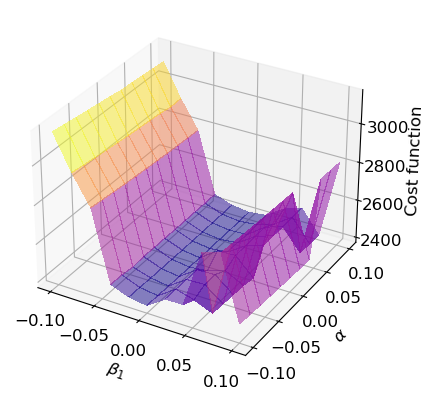

In [30]:
C1_C3_lim=numpy.linspace(float(params_dimless[0] - h2),float(params_dimless[0] + h2),11)
C3_C1_lim=numpy.linspace(float(params_dimless[2] - h2),float(params_dimless[2] + h2),11)
 
X, Y = numpy.meshgrid(C1_C3_lim,C3_C1_lim)
Z_C1_C3= numpy.zeros((len(C1_C3_lim), len(C3_C1_lim)))
for i in range (len(C1_C3_lim)):
    for j in range (len(C3_C1_lim)):
        Z_C1_C3[i, j] = J_cost([C1_C3_lim[i], params_dimless[1], C3_C1_lim[j], params_dimless[3]])

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z_C1_C3, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

# fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$\beta_1$', fontsize=12)
ax.set_ylabel(r'$\alpha$', fontsize=12)
ax.set_zlabel('Cost function', fontsize=12)
plt.savefig('beta1_alpha.pdf',bbox_inches='tight')

[0.08855929243285596, 0.00993555983168627, 0.5653339091664727, 3.409513378002055]


/Users/tayebi/miniconda3/envs/all/lib/python3.8/site-packages/ufl/exproperators.py:336: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


JC: 2978.059838133053
[0.08855929243285596, 0.00993555983168627, 0.5778968849257277, 3.409513378002055]
JC: 2823.1950575525907
[0.08855929243285596, 0.00993555983168627, 0.5904598606849826, 3.409513378002055]
JC: 2694.1650348335957
[0.08855929243285596, 0.00993555983168627, 0.6030228364442375, 3.409513378002055]
JC: 2433.12229431068
[0.08855929243285596, 0.00993555983168627, 0.6155858122034925, 3.409513378002055]
JC: 2415.793926524295
[0.08855929243285596, 0.00993555983168627, 0.6281487879627474, 3.409513378002055]
JC: 2420.599818658063
[0.08855929243285596, 0.00993555983168627, 0.6407117637220023, 3.409513378002055]
JC: 2508.4308076578677
[0.08855929243285596, 0.00993555983168627, 0.6532747394812574, 3.409513378002055]
JC: 2527.3946901819904
[0.08855929243285596, 0.00993555983168627, 0.6658377152405123, 3.409513378002055]
JC: 2559.541970704093
[0.08855929243285596, 0.00993555983168627, 0.6784006909997673, 3.409513378002055]
JC: 2855.9848582154673
[0.08855929243285596, 0.00993555983168

/var/folders/c6/mqd4t44j24zgtq0ky02bc6c80000gp/T/ipykernel_23061/941336396.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


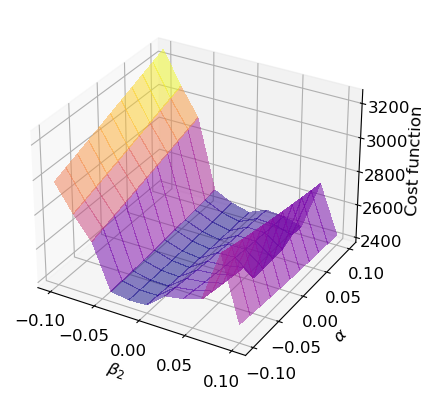

In [31]:
C2_C3_lim=numpy.linspace(float(params_dimless[1] - h2),float(params_dimless[1] + h2),11)
C3_C2_lim=numpy.linspace(float(params_dimless[2] - h2),float(params_dimless[2] + h2),11)
 
X, Y = numpy.meshgrid(C2_C3_lim,C3_C2_lim)
Z_C2_C3= numpy.zeros((len(C2_C3_lim), len(C3_C2_lim)))
for i in range (len(C2_C3_lim)):
    for j in range (len(C3_C2_lim)):
        Z_C2_C3[i, j] = J_cost([params_dimless[0], C2_C3_lim[i], C3_C2_lim[j], params_dimless[3]])

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z_C2_C3, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

ax.set_xlabel(r'$\beta_2$', fontsize=12)
ax.set_ylabel(r'$\alpha$', fontsize=12)
ax.set_zlabel('Cost function', fontsize=12)
plt.savefig('beta2_alpha.pdf',bbox_inches='tight')

[0.07970336318957036, 0.011039510924095856, 0.6281487879627474, 3.0685620402018494]


/Users/tayebi/miniconda3/envs/all/lib/python3.8/site-packages/ufl/exproperators.py:336: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


JC: 2787.549770405084
[0.07970336318957036, 0.011039510924095856, 0.6281487879627474, 3.1367523077618906]
JC: 2651.7182845531947
[0.07970336318957036, 0.011039510924095856, 0.6281487879627474, 3.2049425753219314]
JC: 2540.7458551564605
[0.07970336318957036, 0.011039510924095856, 0.6281487879627474, 3.2731328428819726]
JC: 2466.475920091217
[0.07970336318957036, 0.011039510924095856, 0.6281487879627474, 3.341323110442014]
JC: 2425.3536995352006
[0.07970336318957036, 0.011039510924095856, 0.6281487879627474, 3.409513378002055]
JC: 2414.1196436068903
[0.07970336318957036, 0.011039510924095856, 0.6281487879627474, 3.477703645562096]
JC: 2522.8509082522933
[0.07970336318957036, 0.011039510924095856, 0.6281487879627474, 3.5458939131221374]
JC: 2560.904183498018
[0.07970336318957036, 0.011039510924095856, 0.6281487879627474, 3.6140841806821786]
JC: 3425.1179738326223
[0.07970336318957036, 0.011039510924095856, 0.6281487879627474, 3.68227444824222]
JC: 3360.427794212374
[0.07970336318957036, 0

/var/folders/c6/mqd4t44j24zgtq0ky02bc6c80000gp/T/ipykernel_23061/1135114464.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


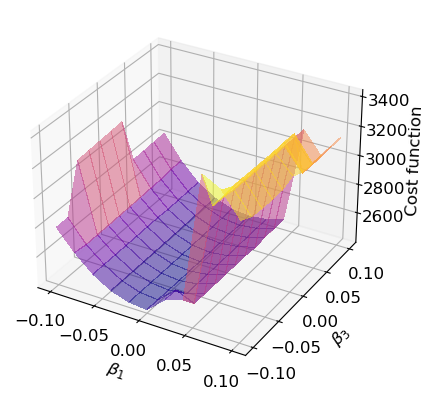

In [32]:
C1_C4_lim=numpy.linspace(float(params_dimless[0] - h2),float(params_dimless[0] + h2),11)
C4_C1_lim=numpy.linspace(float(params_dimless[3] - h2),float(params_dimless[3] + h2),11)
 
X, Y = numpy.meshgrid(C1_C4_lim,C4_C1_lim)
Z_C1_C4= numpy.zeros((len(C1_C4_lim), len(C4_C1_lim)))
for i in range (len(C1_C4_lim)):
    for j in range (len(C4_C1_lim)):
        Z_C1_C4[i, j] = J_cost([C1_C4_lim[i], params_dimless[1], params_dimless[2], C4_C1_lim[j]])

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z_C1_C4, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

ax.set_xlabel(r'$\beta_1$', fontsize=12)
ax.set_ylabel(r'$\beta_3$', fontsize=12)
ax.set_zlabel('Cost function', fontsize=12)
plt.savefig('beta1_beta3.pdf',bbox_inches='tight')

[0.08855929243285596, 0.00993555983168627, 0.6281487879627474, 3.0685620402018494]


/Users/tayebi/miniconda3/envs/all/lib/python3.8/site-packages/ufl/exproperators.py:336: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


JC: 3316.2052196468185
[0.08855929243285596, 0.00993555983168627, 0.6281487879627474, 3.1367523077618906]
JC: 2758.2387247859447
[0.08855929243285596, 0.00993555983168627, 0.6281487879627474, 3.2049425753219314]
JC: 2618.3512100518783
[0.08855929243285596, 0.00993555983168627, 0.6281487879627474, 3.2731328428819726]
JC: 2522.4292129220644
[0.08855929243285596, 0.00993555983168627, 0.6281487879627474, 3.341323110442014]
JC: 2455.319904945106
[0.08855929243285596, 0.00993555983168627, 0.6281487879627474, 3.409513378002055]
JC: 2420.599818658063
[0.08855929243285596, 0.00993555983168627, 0.6281487879627474, 3.477703645562096]
JC: 2415.0761133532255
[0.08855929243285596, 0.00993555983168627, 0.6281487879627474, 3.5458939131221374]
JC: 2435.830422608986
[0.08855929243285596, 0.00993555983168627, 0.6281487879627474, 3.6140841806821786]
JC: 2480.199511894909
[0.08855929243285596, 0.00993555983168627, 0.6281487879627474, 3.68227444824222]
JC: 3181.04449749769
[0.08855929243285596, 0.0099355598

/var/folders/c6/mqd4t44j24zgtq0ky02bc6c80000gp/T/ipykernel_23061/1448693932.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


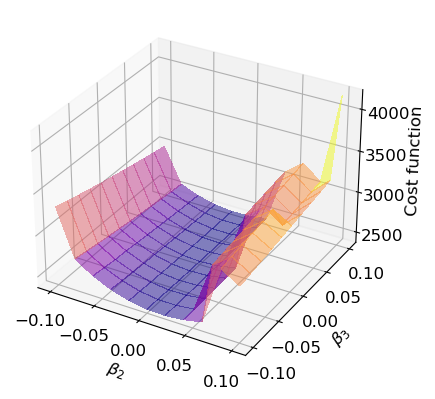

In [33]:
C2_C4_lim=numpy.linspace(float(params_dimless[1] - h2),float(params_dimless[1] + h2),11)
C4_C2_lim=numpy.linspace(float(params_dimless[3] - h2),float(params_dimless[3] + h2),11)
 
X, Y = numpy.meshgrid(C2_C4_lim,C4_C2_lim)
Z_C2_C4= numpy.zeros((len(C2_C4_lim), len(C4_C2_lim)))
for i in range (len(C2_C4_lim)):
    for j in range (len(C4_C2_lim)):
        Z_C2_C4[i, j] = J_cost([params_dimless[0], C2_C4_lim[i], params_dimless[2], C4_C2_lim[j]])

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z_C2_C4, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

ax.set_xlabel(r'$\beta_2$', fontsize=12)
ax.set_ylabel(r'$\beta_3$', fontsize=12)
ax.set_zlabel('Cost function', fontsize=12)
plt.savefig('beta2_beta3.pdf',bbox_inches='tight')

[0.08855929243285596, 0.011039510924095856, 0.5653339091664727, 3.0685620402018494]


/Users/tayebi/miniconda3/envs/all/lib/python3.8/site-packages/ufl/exproperators.py:336: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg in ("+", "-"):


JC: 2450.458880042847
[0.08855929243285596, 0.011039510924095856, 0.5653339091664727, 3.1367523077618906]
JC: 2434.665573172573
[0.08855929243285596, 0.011039510924095856, 0.5653339091664727, 3.2049425753219314]
JC: 2520.5938650204844
[0.08855929243285596, 0.011039510924095856, 0.5653339091664727, 3.2731328428819726]
JC: 2548.5864239893117
[0.08855929243285596, 0.011039510924095856, 0.5653339091664727, 3.341323110442014]
JC: 2930.651261328015
[0.08855929243285596, 0.011039510924095856, 0.5653339091664727, 3.409513378002055]
JC: 3119.1577675466438
[0.08855929243285596, 0.011039510924095856, 0.5653339091664727, 3.477703645562096]
JC: 3327.192694337408
[0.08855929243285596, 0.011039510924095856, 0.5653339091664727, 3.5458939131221374]
JC: 3100.799340246142
[0.08855929243285596, 0.011039510924095856, 0.5653339091664727, 3.6140841806821786]
JC: 3295.2820247056497
[0.08855929243285596, 0.011039510924095856, 0.5653339091664727, 3.68227444824222]
JC: 4777.256140186659
[0.08855929243285596, 0.0

/var/folders/c6/mqd4t44j24zgtq0ky02bc6c80000gp/T/ipykernel_23061/582500087.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


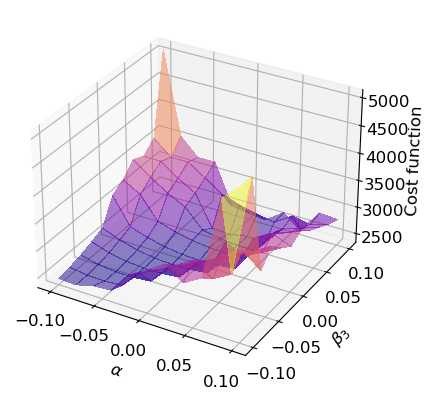

In [34]:
C3_C4_lim=numpy.linspace(float(params_dimless[2] - h2),float(params_dimless[2] + h2),11)
C4_C3_lim=numpy.linspace(float(params_dimless[3] - h2),float(params_dimless[3] + h2),11)
 
X, Y = numpy.meshgrid(C3_C4_lim,C4_C3_lim)
Z_C3_C4= numpy.zeros((len(C3_C4_lim), len(C4_C3_lim)))
for i in range (len(C3_C4_lim)):
    for j in range (len(C4_C3_lim)):
        Z_C3_C4[i, j] = J_cost([params_dimless[0], params_dimless[1], C3_C4_lim[i], C4_C3_lim[j]])

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z_C3_C4, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

ax.set_xlabel(r'$\alpha$', fontsize=12)
ax.set_ylabel(r'$\beta_3$', fontsize=12)
ax.set_zlabel('Cost function', fontsize=12)
plt.savefig('alpha_beta3.pdf', bbox_inches='tight')